In [31]:
import hw4
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

%reload_ext autoreload
%autoreload 2

In [32]:

data = hw4.load_data("countries.csv")
country_names = [row["Country"] for row in data]
features = [hw4.calc_features(row) for row in data]
features_normalized = hw4.normalize_features(features)
n =20
Z_raw = hw4.hac(features[:n])


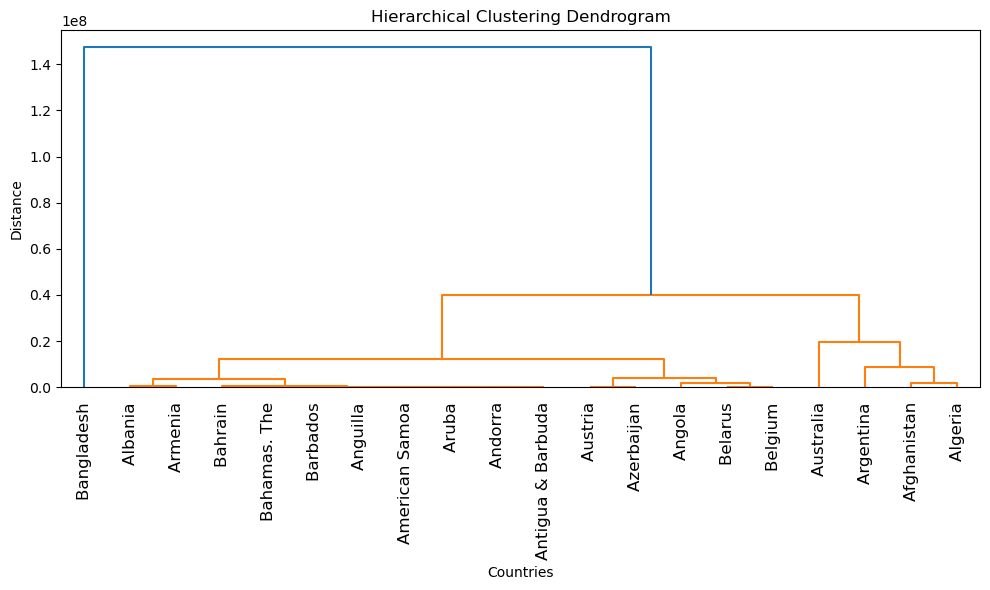

In [33]:
Z_normalized = hw4.hac(features_normalized[:n])
fig = hw4.fig_hac(Z_raw, country_names[:n])
plt.show()

In [13]:
data = hw4.load_data("countries.csv")
country_names = [row["Country"] for row in data]
features = [hw4.calc_features(row) for row in data]
n=20

In [16]:
matrix=hw4.hac(features)
matrix

204

In [ ]:
matrix[:10]

In [ ]:
# features_normalized = normalize_features(features)
n = 20
Z_raw = HW4.hac(features[:n])
# Z_normalized = hac(features_normalized[:n])
fig = HW4.fig_hac(Z_raw, country_names[:n])
plt.show()

In [ ]:
scipy_dist_matrix = distance_matrix(features, features, p=2)
scipy_dist_matrix[:10]

In [ ]:
scipy_dist_matrix=np.append(scipy_dist_matrix, [10, 1])
scipy_dist_matrix[-10:]

In [ ]:
clusters=[]
clusters.append([10, 10])
clusters

In [ ]:
Z

In [ ]:
import numpy as np

def hac(features):
    n = len(features)
    
    # Initialize the distance matrix
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            # Compute Euclidean distance between points
            distance_matrix[i, j] = np.linalg.norm(features[i] - features[j])
            distance_matrix[j, i] = distance_matrix[i, j]
    
    # Initialize the cluster dictionary
    cluster_dict = {i: [i] for i in range(n)}  # Each point initially forms its own cluster
    
    # Initialize the array to store clustering information
    Z = np.zeros((n - 1, 4))
    
    for i in range(n - 1):
        min_dist = np.inf
        cluster1 = None
        cluster2 = None
        
        # Find the closest clusters
        for j in range(n):
            if j not in cluster_dict:
                continue
            for k in range(j + 1, n):
                 if k not in cluster_dict:
                    continue
                if distance_matrix[j, k] < min_dist:
                    min_dist = distance_matrix[j, k]
                    cluster1 = j
                    cluster2 = k
                elif distance_matrix[j, k] == min_dist:
                    # Tie-breaking rule
                    if min(j, k) < min(cluster1, cluster2):
                        cluster1 = j
                        cluster2 = k
        
        # Update clustering information
        merged_cluster_index = n + i
        merged_cluster = cluster_dict[cluster1] + cluster_dict[cluster2]
        cluster_dict[merged_cluster_index] = merged_cluster
        del cluster_dict[cluster1]
        del cluster_dict[cluster2]
        
        Z[i, 0] = cluster1
        Z[i, 1] = cluster2
        Z[i, 2] = min_dist
        Z[i, 3] = len(merged_cluster)
        
        # Update distance matrix
        for j in range(n):
            if j in cluster_dict:
                distance_to_merged = max(distance_matrix[cluster1, j], distance_matrix[cluster2, j])
                distance_matrix[merged_cluster_index, j] = distance_to_merged
                distance_matrix[j, merged_cluster_index] = distance_to_merged
         
        # Set distances to infinity for merged clusters
        distance_matrix[cluster1, :] = np.inf
        distance_matrix[:, cluster1] = np.inf
        distance_matrix[cluster2, :] = np.inf
        distance_matrix[:, cluster2] = np.inf
    
    return Z
